In [0]:
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans,KMeansModel
from pyspark.ml.feature import StandardScaler,VectorAssembler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
SS = SparkSession.builder.appName('clustering').getOrCreate()

In [0]:
df = SS.read.format('libsvm').load('/FileStore/tables/sample_kmeans_data.txt')

In [0]:
KM = KMeans(k=3,seed=1)

In [0]:
fitted = KM.fit(df)

In [0]:
pred=fitted.transform(df)

In [0]:
pred.show()

+-----+--------------------+----------+
label| features|prediction|
+-----+--------------------+----------+
 0.0| (3,[],[])| 1|
 1.0|(3,[0,1,2],[0.1,0...| 1|
 2.0|(3,[0,1,2],[0.2,0...| 2|
 3.0|(3,[0,1,2],[9.0,9...| 0|
 4.0|(3,[0,1,2],[9.1,9...| 0|
 5.0|(3,[0,1,2],[9.2,9...| 0|
+-----+--------------------+----------+

In [0]:
SS1 = SparkSession.builder.appName('cluster').getOrCreate()

In [0]:
df1 = SS1.read.csv('/FileStore/tables/seeds_dataset.csv',inferSchema=True,header=True)

In [0]:
df1.columns

Out[41]: ['area',
 'perimeter',
 'compactness',
 'length_of_kernel',
 'width_of_kernel',
 'asymmetry_coefficient',
 'length_of_groove']

In [0]:
VA = VectorAssembler(inputCols=df1.columns,outputCol='features').transform(df1)

In [0]:
SS = StandardScaler(inputCol='features',outputCol='features')

In [0]:
scaled = SS.fit(VA)

In [0]:
data = scaled.transform(VA)

In [0]:
data.show()

+-----+---------+-----------+------------------+------------------+---------------------+------------------+--------------------+--------------------+
 area|perimeter|compactness| length_of_kernel| width_of_kernel|asymmetry_coefficient| length_of_groove| features| features1|
+-----+---------+-----------+------------------+------------------+---------------------+------------------+--------------------+--------------------+
15.26| 14.84| 0.871| 5.763| 3.312| 2.221| 5.22|[15.26,14.84,0.87...|[5.24452795332028...|
14.88| 14.57| 0.8811| 5.553999999999999| 3.333| 1.018| 4.956|[14.88,14.57,0.88...|[5.11393027165175...|
14.29| 14.09| 0.905| 5.291|3.3369999999999997| 2.699| 4.825|[14.29,14.09,0.90...|[4.91116018695588...|
13.84| 13.94| 0.8955| 5.324|3.3789999999999996| 2.259| 4.805|[13.84,13.94,0.89...|[4.75650503761158...|
16.14| 14.99| 0.9034|5.6579999999999995| 3.562| 1.355| 5.175|[16.14,14.99,0.90...|[5.54696468981581...|
14.38| 14.21| 0.8951| 5.386| 3.312| 2.4619999999999997| 4.956|[14.38,14.21,0.89...|[4.94209121682475...|
14.69| 14.49| 0.8799| 5.563| 3.259| 3.5860000000000003| 5.218999999999999|[14.69,14.49,0.87...|[5.04863143081749...|
14.11| 14.1| 0.8911| 5.42| 3.302| 2.7| 5.0|[14.11,14.1,0.891...|[4.84929812721816...|
16.63| 15.46| 0.8747| 6.053| 3.465| 2.04| 5.877000000000001|[16.63,15.46,0.87...|[5.71536696354628...|
16.44| 15.25| 0.888|5.8839999999999995| 3.505| 1.969|5.5329999999999995|[16.44,15.25,0.88...|[5.65006812271202...|
15.26| 14.85| 0.8696|5.7139999999999995| 3.242| 4.543| 5.314|[15.26,14.85,0.86...|[5.24452795332028...|
14.03| 14.16| 0.8796| 5.438| 3.201| 1.7169999999999999| 5.001|[14.03,14.16,0.87...|[4.82180387844584...|
13.89| 14.02| 0.888| 5.439| 3.199| 3.986| 4.738|[13.89,14.02,0.88...|[4.77368894309428...|
13.78| 14.06| 0.8759| 5.479| 3.156| 3.136| 4.872|[13.78,14.06,0.87...|[4.73588435103234...|
13.74| 14.05| 0.8744| 5.482| 3.114| 2.932| 4.825|[13.74,14.05,0.87...|[4.72213722664617...|
14.59| 14.28| 0.8993| 5.351| 3.333| 4.185| 4.781000000000001|[14.59,14.28,0.89...|[5.01426361985209...|
13.99| 13.83| 0.9183| 5.119| 3.383| 5.234| 4.781000000000001|[13.99,13.83,0.91...|[4.80805675405968...|
15.69| 14.75| 0.9058| 5.527| 3.514| 1.599| 5.046|[15.69,14.75,0.90...|[5.39230954047151...|
 14.7| 14.21| 0.9153| 5.205| 3.466| 1.767| 4.649|[14.7,14.21,0.915...|[5.05206821191403...|
12.72| 13.57| 0.8686| 5.226| 3.049| 4.102| 4.914|[12.72,13.57,0.86...|[4.37158555479908...|
+-----+---------+-----------+------------------+------------------+---------------------+------------------+--------------------+--------------------+
only showing top 20 rows

In [0]:
KM = KMeans(featuresCol='features1',k=3)
KM1 = KM.fit(data)

In [0]:
dt = KM1.transform(data).select(['features1','prediction'])

In [0]:
dt.show()

+--------------------+----------+
 features1|prediction|
+--------------------+----------+
[5.24452795332028...| 0|
[5.11393027165175...| 0|
[4.91116018695588...| 0|
[4.75650503761158...| 0|
[5.54696468981581...| 0|
[4.94209121682475...| 0|
[5.04863143081749...| 0|
[4.84929812721816...| 0|
[5.71536696354628...| 1|
[5.65006812271202...| 0|
[5.24452795332028...| 0|
[4.82180387844584...| 0|
[4.77368894309428...| 0|
[4.73588435103234...| 0|
[4.72213722664617...| 0|
[5.01426361985209...| 0|
[4.80805675405968...| 0|
[5.39230954047151...| 0|
[5.05206821191403...| 0|
[4.37158555479908...| 2|
+--------------------+----------+
only showing top 20 rows

In [0]:
df1.describe().show()

+-------+------------------+------------------+--------------------+-------------------+------------------+---------------------+-------------------+
summary| area| perimeter| compactness| length_of_kernel| width_of_kernel|asymmetry_coefficient| length_of_groove|
+-------+------------------+------------------+--------------------+-------------------+------------------+---------------------+-------------------+
 count| 210| 210| 210| 210| 210| 210| 210|
 mean|14.847523809523816|14.559285714285718| 0.8709985714285714| 5.628533333333335| 3.258604761904762| 3.7001999999999997| 5.408071428571429|
 stddev|2.9096994306873647|1.3059587265640225|0.023629416583846364|0.44306347772644983|0.3777144449065867| 1.5035589702547392|0.49148049910240543|
 min| 10.59| 12.41| 0.8081| 4.899| 2.63| 0.765| 4.519|
 max| 21.18| 17.25| 0.9183| 6.675| 4.033| 8.456| 6.55|
+-------+------------------+------------------+--------------------+-------------------+------------------+---------------------+-------------------+

In [0]:
KM1.summary.trainingCost

Out[85]: 428.6720009438313

In [0]:
df = SS1.read.csv('/FileStore/tables/hack_data.csv',inferSchema=True,header=True)

In [0]:
df.select('Session_Connection_Time','Bytes Transferred','Kali_Trace_Used','Servers_Corrupted','Pages_Corrupted','WPM_Typing_Speed')

+-----------------------+-----------------+---------------+-----------------+---------------+--------------------+----------------+
Session_Connection_Time|Bytes Transferred|Kali_Trace_Used|Servers_Corrupted|Pages_Corrupted| Location|WPM_Typing_Speed|
+-----------------------+-----------------+---------------+-----------------+---------------+--------------------+----------------+
 8.0| 391.09| 1| 2.96| 7.0| Slovenia| 72.37|
 20.0| 720.99| 0| 3.04| 9.0|British Virgin Is...| 69.08|
 31.0| 356.32| 1| 3.71| 8.0| Tokelau| 70.58|
 2.0| 228.08| 1| 2.48| 8.0| Bolivia| 70.8|
 20.0| 408.5| 0| 3.57| 8.0| Iraq| 71.28|
 1.0| 390.69| 1| 2.79| 9.0| Marshall Islands| 71.57|
 18.0| 342.97| 1| 5.1| 7.0| Georgia| 72.32|
 22.0| 101.61| 1| 3.03| 7.0| Timor-Leste| 72.03|
 15.0| 275.53| 1| 3.53| 8.0|Palestinian Terri...| 70.17|
 12.0| 424.83| 1| 2.53| 8.0| Bangladesh| 69.99|
 15.0| 249.09| 1| 3.39| 9.0|Northern Mariana ...| 70.77|
 32.0| 242.48| 0| 4.24| 8.0| Zimbabwe| 67.93|
 23.0| 514.54| 0| 3.18| 8.0| Isle of Man| 68.56|
 9.0| 284.77| 0| 3.12| 9.0|Sao Tome and Prin...| 70.82|
 27.0| 779.25| 1| 2.37| 8.0| Greece| 72.73|
 12.0| 307.31| 1| 3.22| 7.0| Solomon Islands| 67.95|
 21.0| 355.94| 1| 2.0| 7.0| Guinea-Bissau| 72.0|
 10.0| 372.65| 0| 3.33| 7.0| Burkina Faso| 69.19|
 20.0| 347.23| 1| 2.33| 7.0| Mongolia| 70.41|
 22.0| 456.57| 0| 1.52| 8.0| Nigeria| 69.35|
 25.0| 582.03| 0| 3.29| 7.0| Kazakhstan| 69.85|
 19.0| 67.17| 0| 3.25| 7.0| Faroe Islands| 69.73|
 16.0| 410.08| 1| 3.07| 8.0| Lebanon| 68.49|
 18.0| 393.15| 0| 2.25| 8.0| Guyana| 70.87|
 34.0| 11.04| 0| 2.31| 8.0| Botswana| 72.0|
 30.0| 309.84| 0| 3.8| 9.0| Zambia| 70.98|
 20.0| 415.39| 1| 3.47| 7.0| Mexico| 69.98|
 23.0| 537.94| 1| 2.96| 7.0| Mongolia| 68.74|
 21.0| 206.31| 0| 2.75| 8.0| Gibraltar| 68.82|
 20.0| 192.85| 1| 2.21| 8.0| Bhutan| 73.1|
+-----------------------+-----------------+---------------+-----------------+---------------+--------------------+----------------+
only showing top 30 rows

In [0]:
VA1 = VectorAssembler(inputCols=['Session_Connection_Time','Bytes Transferred','Kali_Trace_Used','Servers_Corrupted','Pages_Corrupted','WPM_Typing_Speed'],outputCol='features').transform(df)

SS1 = StandardScaler(inputCol='features',outputCol='Scaled')

In [0]:
fitted = SS1.fit(VA1)
transformed = fitted.transform(VA1)

In [0]:
transformed.show()

+-----------------------+-----------------+---------------+-----------------+---------------+--------------------+----------------+--------------------+--------------------+
Session_Connection_Time|Bytes Transferred|Kali_Trace_Used|Servers_Corrupted|Pages_Corrupted| Location|WPM_Typing_Speed| features| Scaled|
+-----------------------+-----------------+---------------+-----------------+---------------+--------------------+----------------+--------------------+--------------------+
 8.0| 391.09| 1| 2.96| 7.0| Slovenia| 72.37|[8.0,391.09,1.0,2...|[0.56785108466505...|
 20.0| 720.99| 0| 3.04| 9.0|British Virgin Is...| 69.08|[20.0,720.99,0.0,...|[1.41962771166263...|
 31.0| 356.32| 1| 3.71| 8.0| Tokelau| 70.58|[31.0,356.32,1.0,...|[2.20042295307707...|
 2.0| 228.08| 1| 2.48| 8.0| Bolivia| 70.8|[2.0,228.08,1.0,2...|[0.14196277116626...|
 20.0| 408.5| 0| 3.57| 8.0| Iraq| 71.28|[20.0,408.5,0.0,3...|[1.41962771166263...|
 1.0| 390.69| 1| 2.79| 9.0| Marshall Islands| 71.57|[1.0,390.69,1.0,2...|[0.07098138558313...|
 18.0| 342.97| 1| 5.1| 7.0| Georgia| 72.32|[18.0,342.97,1.0,...|[1.27766494049636...|
 22.0| 101.61| 1| 3.03| 7.0| Timor-Leste| 72.03|[22.0,101.61,1.0,...|[1.56159048282889...|
 15.0| 275.53| 1| 3.53| 8.0|Palestinian Terri...| 70.17|[15.0,275.53,1.0,...|[1.06472078374697...|
 12.0| 424.83| 1| 2.53| 8.0| Bangladesh| 69.99|[12.0,424.83,1.0,...|[0.85177662699757...|
 15.0| 249.09| 1| 3.39| 9.0|Northern Mariana ...| 70.77|[15.0,249.09,1.0,...|[1.06472078374697...|
 32.0| 242.48| 0| 4.24| 8.0| Zimbabwe| 67.93|[32.0,242.48,0.0,...|[2.27140433866020...|
 23.0| 514.54| 0| 3.18| 8.0| Isle of Man| 68.56|[23.0,514.54,0.0,...|[1.63257186841202...|
 9.0| 284.77| 0| 3.12| 9.0|Sao Tome and Prin...| 70.82|[9.0,284.77,0.0,3...|[0.63883247024818...|
 27.0| 779.25| 1| 2.37| 8.0| Greece| 72.73|[27.0,779.25,1.0,...|[1.91649741074455...|
 12.0| 307.31| 1| 3.22| 7.0| Solomon Islands| 67.95|[12.0,307.31,1.0,...|[0.85177662699757...|
 21.0| 355.94| 1| 2.0| 7.0| Guinea-Bissau| 72.0|[21.0,355.94,1.0,...|[1.49060909724576...|
 10.0| 372.65| 0| 3.33| 7.0| Burkina Faso| 69.19|[10.0,372.65,0.0,...|[0.70981385583131...|
 20.0| 347.23| 1| 2.33| 7.0| Mongolia| 70.41|[20.0,347.23,1.0,...|[1.41962771166263...|
 22.0| 456.57| 0| 1.52| 8.0| Nigeria| 69.35|[22.0,456.57,0.0,...|[1.56159048282889...|
+-----------------------+-----------------+---------------+-----------------+---------------+--------------------+----------------+--------------------+--------------------+
only showing top 20 rows

In [0]:
cost = {}
cost1 = []

In [0]:
for i in range(2,8):
  Km = KMeans(featuresCol='Scaled',k=i).fit(transformed)
  cost[i] = Km.summary.trainingCost
  cost1.append(Km.summary.trainingCost)

In [0]:
cost

Out[118]: {2: 601.7707512676691,
 3: 434.1492898715821,
 4: 267.1336116887894,
 5: 247.7134517387051,
 6: 241.68004949443153,
 7: 221.03185042962988}

Out[123]:

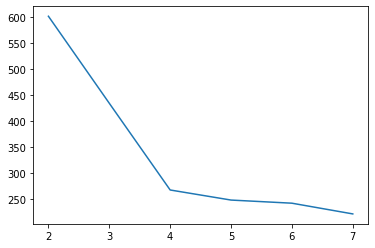

<matplotlib.axes._subplots.AxesSubplot at 0x7f1b66b126d0>

In [0]:
sns.lineplot(x=cost.keys(),y=cost.values())

In [0]:
Kmm = KMeans(featuresCol='Scaled',k=4).fit(transformed)
Kmm.transform(transformed).groupby('prediction').count().show()

+----------+-----+
prediction|count|
+----------+-----+
 1| 88|
 3| 83|
 2| 79|
 0| 84|
+----------+-----+

In [0]:
Kmm = KMeans(featuresCol='Scaled',k=2).fit(transformed)
Kmm.transform(transformed).groupby('prediction').count().show()

+----------+-----+
prediction|count|
+----------+-----+
 1| 167|
 0| 167|
+----------+-----+